<a href="https://colab.research.google.com/github/Aaaaaamz/CNN/blob/main/Simpleclassification_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple classification algorithm

importing data from kaggle API

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "anandyadav21" # username from the json file
os.environ['KAGGLE_KEY'] = "115a6f58571ea214070851195db83a5e" # Provide your key from the json file
!kaggle competitions download -c dogs-vs-cats # api copied from kaggle

 97% 527M/543M [00:03<00:00, 165MB/s]
100% 543M/543M [00:03<00:00, 146MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 89.6MB/s]
 95% 257M/271M [00:03<00:00, 87.3MB/s]
100% 271M/271M [00:03<00:00, 75.3MB/s]


Importing libraries

In [ ]:
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

Exracting files

In [ ]:


from zipfile import ZipFile

file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


checking no of images

In [ ]:
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


Making folder cat and dogs

In [ ]:
original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir) #make base directory

making three folders test,validation and train

In [ ]:
#Create directory paths

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

copying the images into the cat folder

In [ ]:
import shutil

def createFName(org_data_dir, train_data_class_dir, rangeInput1, rangeInput2):
    "This funciton is to create the source and desitnation paths and copy the data."
    fnames = ['cat.{}.jpg'.format(i) for i in range(rangeInput1,rangeInput2)]
    for fname in fnames:
        src = os.path.join(org_data_dir, fname)
        dst = os.path.join(train_data_class_dir, fname)
        #print(src,dst)
        shutil.copyfile(src, dst)

createFName(original_dataset_dir,train_cats_dir,0,1000)
createFName(original_dataset_dir,validation_cats_dir,1000,1500)
createFName(original_dataset_dir,test_cats_dir,1500,2000)



copying images into the dog folder

In [ ]:
def createFName(org_data_dir, train_data_class_dir, rangeInput1, rangeInput2):
    "This funciton is to create the source and desitnation paths and copy the data."
    fnames = ['dog.{}.jpg'.format(i) for i in range(rangeInput1,rangeInput2)]
    for fname in fnames:
        src = os.path.join(org_data_dir, fname)
        dst = os.path.join(train_data_class_dir, fname)
        #print(src,dst)
        shutil.copyfile(src, dst)


createFName(original_dataset_dir,train_dogs_dir,0,1000)
createFName(original_dataset_dir,validation_dogs_dir,1000,1500)
createFName(original_dataset_dir,test_dogs_dir,1500,2000)


reading no if images in folders

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


compiling

In [12]:

from keras import layers
from keras import models

#Created sequential models using Keras
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


preprocessing data using keras

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


fitting the model

In [14]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 39s 67ms/step - loss: 0.7381 - acc: 0.5375 - val_loss: 0.6827 - val_acc: 0.5500
Epoch 2/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6810 - acc: 0.6040 - val_loss: 0.5819 - val_acc: 0.7000
Epoch 3/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6217 - acc: 0.6545 - val_loss: 0.7037 - val_acc: 0.6300
Epoch 4/30
100/100 [==============================] - 7s 67ms/step - loss: 0.5878 - acc: 0.7000 - val_loss: 0.5989 - val_acc: 0.6800
Epoch 5/30
100/100 [==============================] - 7s 67ms/step - loss: 0.5283 - acc: 0.7395 - val_loss: 0.6737 - val_acc: 0.6650
Epoch 6/30
100/100 [==============================] - 7s 67ms/step - loss: 0.4759 - acc: 0.7715 - val_loss: 0.8154 - val_acc: 0.6800
Epoch 7/30
100/100 [==============================] - 7s 67ms/step - loss: 0.4382 - acc: 0.8000 - val_loss: 0.5757 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 7s 67ms/step -

training and validation results

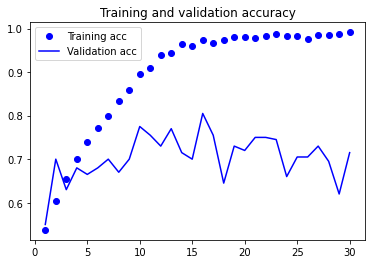

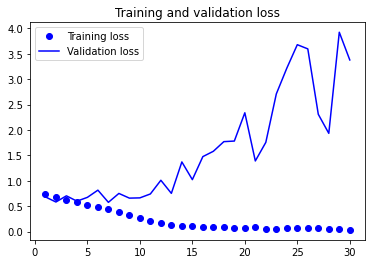

In [15]:
model.save('cats_and_dogs_small_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()